## Análise de Dados da Manutenção 01

In [7]:
import pandas as pd

# Caminho do arquivo Excel
arquivo_excel = "base_manutenção01.xlsx"

# Carregar todas as abas do arquivo em um dicionário
dfs = pd.read_excel("base_manutenção01.xlsx", sheet_name=None)

# Exibir os nomes das abas disponíveis
print("Abas disponíveis:", dfs.keys())

# Acessar cada aba individualmente
aba1 = dfs["dOperadores3"]
aba2 = dfs["dEquipamentos1"]
aba3 = dfs["fPCM"]

# Exibir as primeiras linhas de cada aba
display(aba1.head())
display(aba2.head())
display(aba3.head())


Abas disponíveis: dict_keys(['dOperadores3', 'dEquipamentos1', 'fPCM'])


,ID Operador,Operador
0,1,Eletricista
1,2,Mecânico
2,3,Equipe de Refrigeração
3,4,Marceneiro


,ID Equipamento,Equipamento
0,1,Gerador de Energia
1,2,Ar Condicionado 9000BTUs
2,3,Ar Condicionado 12000BTUs
3,4,Ar Condicionado 36000BTUs
4,5,Ar Condicionado ACJ


,Data Criação,Data Encerramento,Prioridade,ID Ocorrencia,ID Equipamento,ID Atendente,ID Operador,OP,Produção,ID Produto,Início do Serviço,Término do Serviço
0,2020-01-19 03:00:00,2020-01-19 06:40:00,1,1,105,4,3,8,12977,3,03:00:00,06:40:00
1,2020-01-19 03:00:00,2020-01-19 14:08:00,1,5,40,3,2,7,12412,1,03:00:00,14:08:00
2,2020-01-21 03:00:00,2020-01-21 06:45:00,1,2,77,3,1,17,11876,4,03:00:00,06:45:00
3,2020-01-21 03:00:00,2020-01-21 06:45:00,1,5,111,1,1,19,12154,7,03:00:00,06:45:00
4,2020-01-21 03:00:00,2020-01-21 17:45:00,1,6,18,4,3,13,10705,6,03:00:00,17:45:00


In [9]:
# Concatenar as planilhas com base nos IDs correspondentes
planilha_combinada = aba3.merge(aba1, on="ID Operador", how="left").merge(aba2, on="ID Equipamento", how="left")

# Exibir as primeiras linhas da planilha combinada
display(planilha_combinada.head())

,Data Criação,Data Encerramento,Prioridade,ID Ocorrencia,ID Equipamento,ID Atendente,ID Operador,OP,Produção,ID Produto,Início do Serviço,Término do Serviço,Operador,Equipamento
0,2020-01-19 03:00:00,2020-01-19 06:40:00,1,1,105,4,3,8,12977,3,03:00:00,06:40:00,Equipe de Refrigeração,Fogão industrial5
1,2020-01-19 03:00:00,2020-01-19 14:08:00,1,5,40,3,2,7,12412,1,03:00:00,14:08:00,Mecânico,Equipamento 40
2,2020-01-21 03:00:00,2020-01-21 06:45:00,1,2,77,3,1,17,11876,4,03:00:00,06:45:00,Eletricista,Equipamento 77
3,2020-01-21 03:00:00,2020-01-21 06:45:00,1,5,111,1,1,19,12154,7,03:00:00,06:45:00,Eletricista,Câmara fria 011
4,2020-01-21 03:00:00,2020-01-21 17:45:00,1,6,18,4,3,13,10705,6,03:00:00,17:45:00,Equipe de Refrigeração,Equipamento 18


Abas disponíveis: dict_keys(['dOperadores3', 'dEquipamentos1', 'fPCM'])


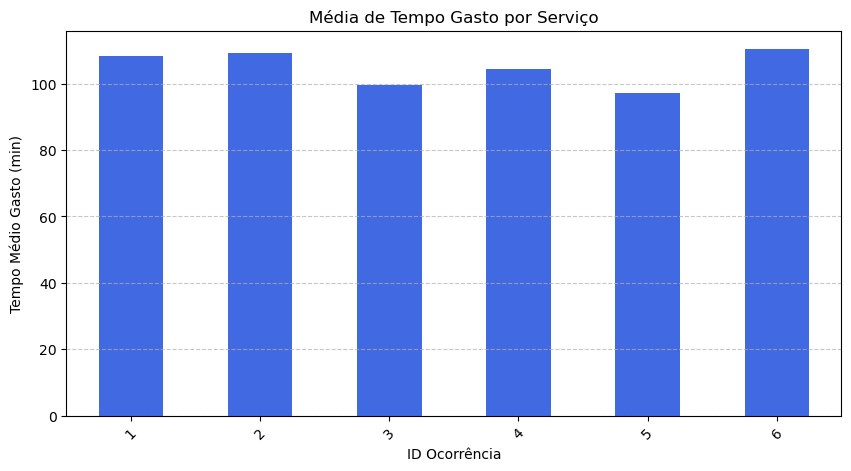

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo Excel
arquivo_excel = "base_manutenção01.xlsx"

# Carregar todas as abas do arquivo em um dicionário
dfs = pd.read_excel(arquivo_excel, sheet_name=None)

# Exibir os nomes das abas disponíveis
print("Abas disponíveis:", dfs.keys())

# Acessar cada aba individualmente
aba1 = dfs["dOperadores3"]
aba2 = dfs["dEquipamentos1"]
aba3 = dfs["fPCM"]

# Concatenar as planilhas com base nos IDs correspondentes
planilha_combinada = aba3.merge(aba1, on="ID Operador", how="left").merge(aba2, on="ID Equipamento", how="left")

# Converter colunas de tempo para formato datetime
planilha_combinada["Início do Serviço"] = pd.to_datetime(planilha_combinada["Início do Serviço"], format="%H:%M:%S").dt.time
planilha_combinada["Término do Serviço"] = pd.to_datetime(planilha_combinada["Término do Serviço"], format="%H:%M:%S").dt.time

# Criar colunas auxiliares combinando com uma data fictícia para cálculo de diferença
planilha_combinada["Inicio_dt"] = pd.to_datetime("2023-01-01 " + planilha_combinada["Início do Serviço"].astype(str))
planilha_combinada["Termino_dt"] = pd.to_datetime("2023-01-01 " + planilha_combinada["Término do Serviço"].astype(str))

# Calcular tempo gasto em minutos
planilha_combinada["Tempo Gasto (min)"] = (planilha_combinada["Termino_dt"] - planilha_combinada["Inicio_dt"]).dt.total_seconds() / 60

# Calcular a média do tempo gasto por serviço
media_tempo_gasto = planilha_combinada.groupby("ID Ocorrencia")["Tempo Gasto (min)"].mean()

# Criar gráfico
plt.figure(figsize=(10, 5))
media_tempo_gasto.plot(kind="bar", color="royalblue")
plt.xlabel("ID Ocorrência")
plt.ylabel("Tempo Médio Gasto (min)")
plt.title("Média de Tempo Gasto por Serviço")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

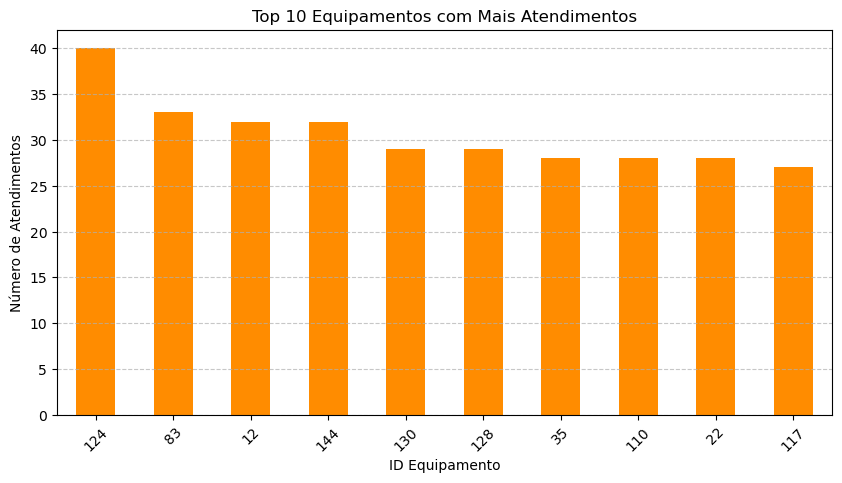

In [15]:
# Calcular o top 10 equipamentos com mais atendimentos
top_equipamentos = planilha_combinada["ID Equipamento"].value_counts().head(10)

# Criar gráfico
plt.figure(figsize=(10, 5))
top_equipamentos.plot(kind="bar", color="darkorange")
plt.xlabel("ID Equipamento")
plt.ylabel("Número de Atendimentos")
plt.title("Top 10 Equipamentos com Mais Atendimentos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
# Calcular o top 10 equipamentos com mais atendimentos
top_equipamentos = planilha_combinada["ID Equipamento"].value_counts().head(10)

display(top_equipamentos)

ID Equipamento
124    40
83     33
12     32
144    32
130    29
128    29
35     28
110    28
22     28
117    27
Name: count, dtype: int64

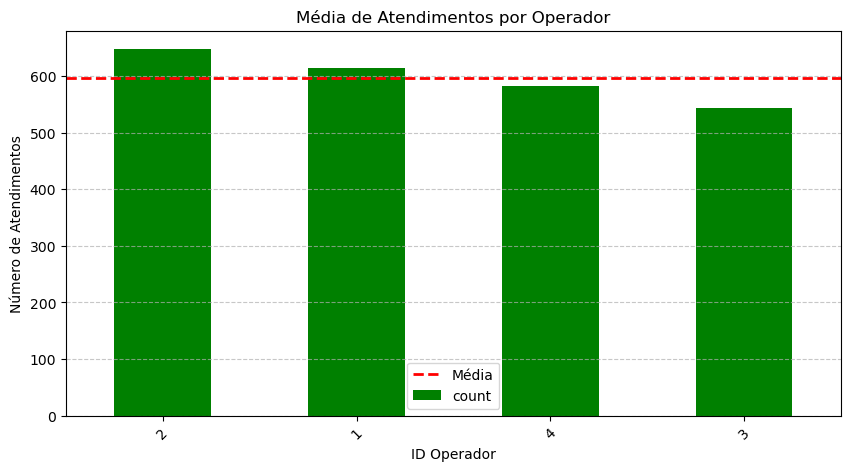

In [29]:
# Calcular a média de atendimentos por operador
media_atendimentos_operador = planilha_combinada["ID Operador"].value_counts().mean()

# Criar gráfico
plt.figure(figsize=(10, 5))
planilha_combinada["ID Operador"].value_counts().plot(kind="bar", color="green")
plt.axhline(media_atendimentos_operador, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.xlabel("ID Operador")
plt.ylabel("Número de Atendimentos")
plt.title("Média de Atendimentos por Operador")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
